In [15]:
blogs <- readLines("en_US.blogs.txt", encoding = "UTF-8", skipNul = TRUE)
news <- readLines("en_US.news.txt", encoding = "UTF-8", skipNul = TRUE)
twitter <- readLines("en_US.twitter.txt", encoding = "UTF-8", skipNul = TRUE)

In [ ]:
# Getting data and exploratory analysis

In [16]:
library(stringi)

## File sizes in MB
blogs.size <- file.info("en_US.blogs.txt")$size / 1024 ^ 2
news.size <- file.info("en_US.news.txt")$size / 1024 ^ 2
twitter.size <- file.info("en_US.twitter.txt")$size / 1024 ^ 2

# Number words in files
blogs.words <- stri_count_words(blogs)
news.words <- stri_count_words(news)
twitter.words <- stri_count_words(twitter)

# Summary data frame
data.frame(source = c("blogs", "news", "twitter"),
           file.size.MB = c(blogs.size, news.size, twitter.size),
           num.lines = c(length(blogs), length(news), length(twitter)),
           num.words = c(sum(blogs.words), sum(news.words), sum(twitter.words)),
           mean.num.words = c(mean(blogs.words), mean(news.words), mean(twitter.words)))

source,file.size.MB,num.lines,num.words,mean.num.words
blogs,200.4242,899288,37546246,41.75108
news,196.2775,1010242,34762395,34.40997
twitter,159.3641,2360148,30093410,12.75065


In [70]:
# Subsetting (8%) data for analysis

In [71]:
data.sample <- c(sample(blogs, length(blogs) * 0.0008),
                 sample(news, length(news) * 0.0008),
                 sample(twitter, length(twitter) * 0.0008))

In [72]:
library(tm)
corpus <- VCorpus(VectorSource(data.sample))

In [ ]:
# Normalizing data

In [73]:
corpus <- tm_map(corpus, tolower)
corpus <- tm_map(corpus, removeWords, stopwords("en"))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, stripWhitespace)
corpus <- tm_map(corpus, PlainTextDocument)
corpus <- tm_map(corpus, removeWords, c("the","and","for","that","you","with","this","was","but","have"))

In [74]:
# Tokenize sample into unigrams, bigrams and trigrams

In [75]:
BigramTokenizer <-
  function(x)
    unlist(lapply(ngrams(words(x), 2), paste, collapse = " "), use.names = FALSE)
TrigramTokenizer <-
  function(x)
    unlist(lapply(ngrams(words(x), 3), paste, collapse = " "), use.names = FALSE)

In [76]:
# Words frequency
freq_words <- function(tdm){
  freq <- sort(rowSums(as.matrix(tdm)), decreasing=TRUE)
  freq_df <- data.frame(word=names(freq), freq=freq)
  return(freq_df)
}

In [77]:
unigram <- removeSparseTerms(TermDocumentMatrix(corpus), 0.9999)
unigram_freq <- freq_words(unigram)

bigram <- removeSparseTerms(TermDocumentMatrix(corpus, control = list(tokenize = BigramTokenizer)), 0.9999)
bigram_freq <- freq_words(bigram)

trigram <- removeSparseTerms(TermDocumentMatrix(corpus, control = list(tokenize = TrigramTokenizer)), 0.9999)
trigram_freq <- freq_words(trigram)

In [78]:
freq_plot <- function(data, title) {
  ggplot(data[1:40,], aes(reorder(word, -freq), freq)) +
         labs(x = "Words", y = "Frequency") +
         ggtitle(title) +
         theme(axis.text.x = element_text(angle = 90, size = 12, hjust = 1)) +
         geom_bar(stat = "identity")
}

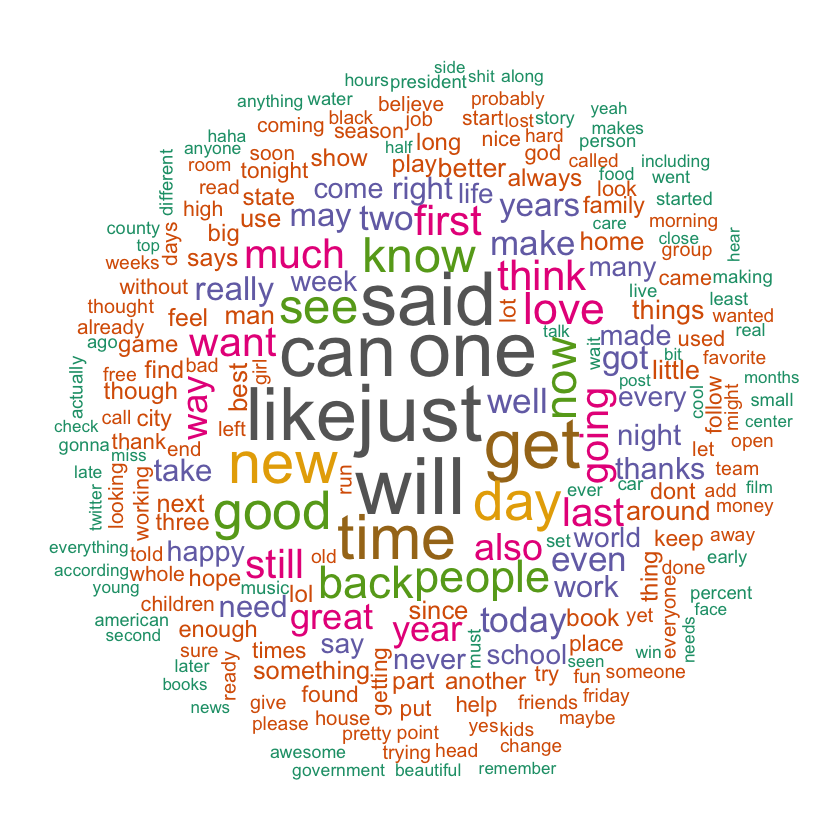

In [92]:
library(wordcloud)
wordcloud(corpus,min.freq = 25,random.order = FALSE, colors = brewer.pal(8,"Dark2"))

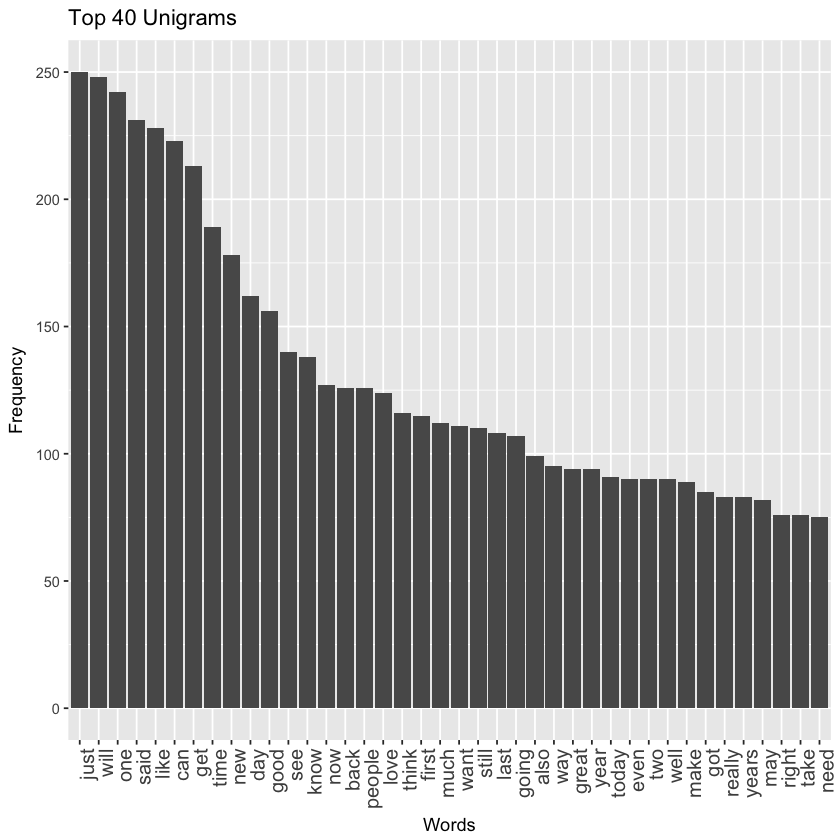

In [79]:
freq_plot(unigram_freq, "Top 40 Unigrams")

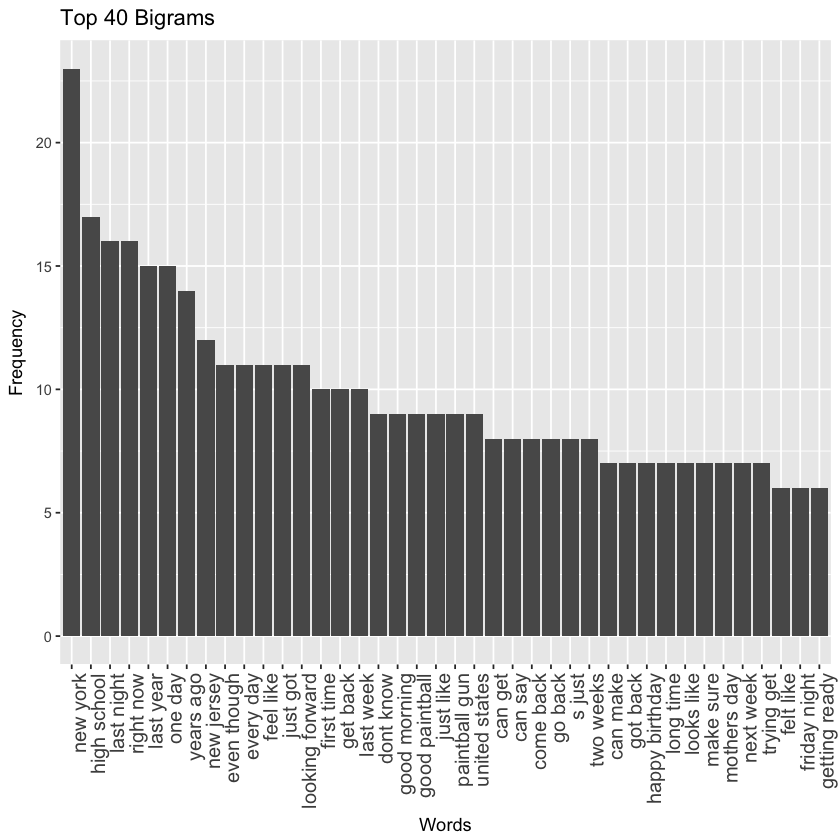

In [80]:
freq_plot(bigram_freq, "Top 40 Bigrams")

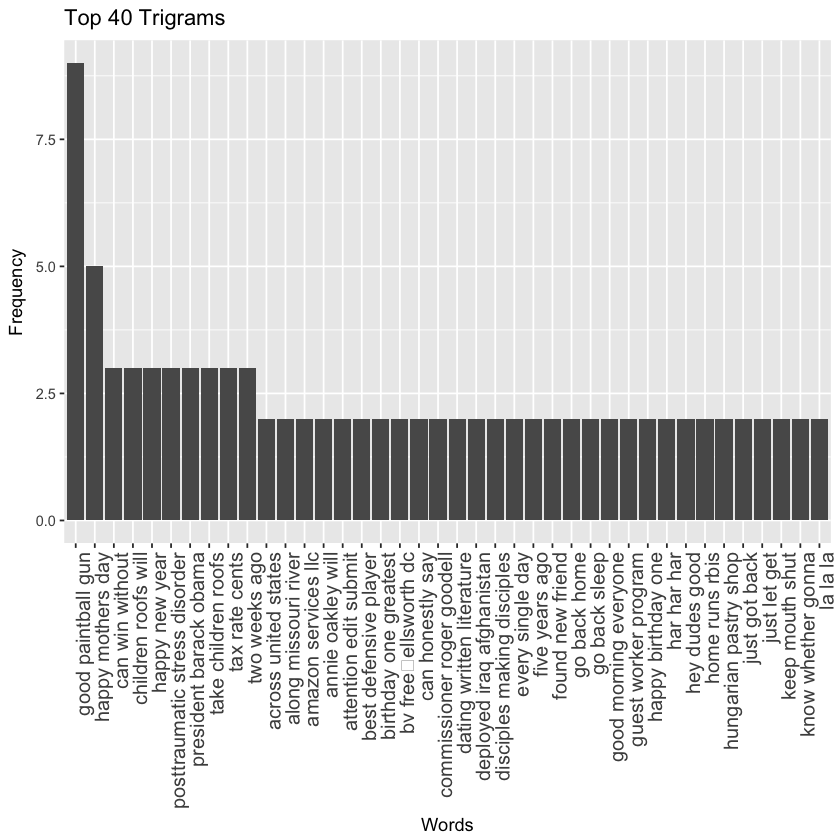

In [81]:
freq_plot(trigram_freq, "Top 40 Trigrams")